In [449]:
# LIBRARIES

import pandas as pd
import string
import re

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [450]:
# READ DATASET

filepath = 'sme_peacock_dataset_v2.csv'

data = pd.read_csv(filepath, header=0, delimiter=';', encoding='utf-8')
data_frame = pd.DataFrame(data)
data_frame

,Order Code,Merchant Name,Store Name,Category,midsc,address1,address2,city_name,province_name,postal_code,...,Vendor,STATUS TOKO,REMARKS,TANGGAL DEPLOYED,LINK FOTO DOKUMENTASI,LINK FOTO DOKUMENTASI.1,LINK FOTO DOKUMENTASI.2,LINK FOTO DOKUMENTASI.3,Collateral Code,Category Code
0,1,ROTI BAKAR RAOS,ROTI BAKAR RAOS,FOOD & BEVERAGES,2196799ROT100540459994,"Jalan Tebet Barat Raya, Jl. Tebet Barat Raya, ...",0,Jakarta Selatan,Jakarta D.K.I.,12810.0,...,Smedia Jakarta,BUKA,ridwan (085883557529),16/05/2022,https://drive.google.com/file/d/1splZB8YXV2O7E...,https://drive.google.com/file/d/1AqyOtLJ7QXdKa...,NaN,NaN,SA,B
1,2,SUMMER HOUSE,SUMMER HOUSE,FOOD & BEVERAGES,2722647SUM093708084227,"Jl. Bintaro Utama I No.16, RT.16/RW.08, Kel. B...",0,Jakarta Selatan,Jakarta D.K.I.,12330.0,...,Smedia Jakarta,BUKA,rivaldi 089612337880,23/05/2022,https://drive.google.com/file/d/1BYJkou0QsdjxI...,https://drive.google.com/file/d/11PwBq_-06kG1W...,NaN,NaN,SA,B
2,3,D BROWN RESTO CAFE,D BROWN RESTO CAFE,FOOD & BEVERAGES,2728502DBR969571586049,"Jl. Paradise 7 No.F1, Kel. Cilandak Barat, Kec...",0,Jakarta Selatan,Jakarta D.K.I.,12430.0,...,Smedia Jakarta,TUTUP PERMANEN,tutup permanen,23/05/2022,https://drive.google.com/file/d/1Ddd3v_NWyiwjz...,NaN,NaN,NaN,SA,B
3,4,MARTABAK SELMIS,MARTABAK SELMIS,FOOD & BEVERAGES,1849903NULL,""" Jl. Asem Baris Raya No.52,Kel Kebon Baru, Ke...",""" Jl. Asem Baris Raya No.52,Kel Kebon Baru, Ke...",Jakarta Selatan,Jakarta D.K.I.,12830.0,...,Smedia Jakarta,BUKA,NaN,19/05/2022,https://drive.google.com/file/d/1hw3mg3jzbIiqQ...,NaN,NaN,NaN,SA,B
4,5,AYAM BAKAR PEJATEN,AYAM BAKAR PEJATEN,FOOD & BEVERAGES,1887293NULL,"""Jl. H.A Wahid, No. 49, Kel. Jati Padang, Kec....","""Jl. H.A Wahid, No. 49, Kel. Jati Padang, Kec....",Jakarta Selatan,Jakarta D.K.I.,12540.0,...,Smedia Jakarta,TUTUP PERMANEN,alamat toko tidak ditemukan,22/05/2022,https://drive.google.com/file/d/1ZwLndHP4l9mik...,NaN,NaN,NaN,SA,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,11752,LION PARCEL,LION PARCEL,PERSONAL SERVICES,2257128LIO101698667547,WTC MANGGA DUA LG BLOK A. NO.25 JL. MANGGA DUA...,0,Jakarta Utara,Jakarta D.K.I.,14430.0,...,Smedia Jakarta,TUTUP PERMANEN,NaN,19/05/2022,https://drive.google.com/file/d/1W2kRVU8l_9sq5...,NaN,NaN,NaN,SA,S
11752,11753,KANTIN JONI,KANTIN JONI,FOOD & BEVERAGES,1786618NULL,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,Jakarta Utara,Jakarta D.K.I.,14430.0,...,Smedia Jakarta,BUKA,joni 08128833378,23/05/2022,https://drive.google.com/file/d/13JZbstzL_qtFk...,NaN,NaN,NaN,SA,B
11753,11754,WAROENG TEH KOTJOK,WAROENG TEH KOTJOK,FOOD & BEVERAGES,106WTKTKYELLOW,Yellow Carwash,Jl. Danau Indah Raya B,Jakarta Utara,Jakarta D.K.I.,14360.0,...,Smedia Jakarta,BUKA,erna 085612536383,23/05/2022,https://drive.google.com/file/d/1osqFWysmHiFQ0...,NaN,NaN,NaN,SA,B
11754,11755,YI MA YI LA,YI MA YI LA,FOOD & BEVERAGES,1844615NULL,"Yima Yila, Jl. Boulevard Raya No. 31, Kel. Kel...","Yima Yila, Jl. Boulevard Raya No. 31, Kel. Kel...",Jakarta Utara,Jakarta D.K.I.,14240.0,...,Smedia Jakarta,BUKA,NaN,11/05/2022,https://drive.google.com/file/d/1UStbDgjz01B05...,https://drive.google.com/file/d/1pjNK9l4aRb_rP...,NaN,NaN,TTCSDS,B


In [451]:
# DROP UNWANTED FEATURES

x_target = data_frame.drop(['Store Name', 'midsc', 'Category', 'address2', 'LINK FOTO DOKUMENTASI', 'LINK FOTO DOKUMENTASI.1', 'LINK FOTO DOKUMENTASI.2', 'LINK FOTO DOKUMENTASI.3', 'Vendor', 'province_name', 'postal_code', 'REMARKS'], axis = 1)
x_target

,Order Code,Merchant Name,address1,city_name,Collateral,STATUS TOKO,TANGGAL DEPLOYED,Collateral Code,Category Code
0,1,ROTI BAKAR RAOS,"Jalan Tebet Barat Raya, Jl. Tebet Barat Raya, ...",Jakarta Selatan,Sticker Acceptance,BUKA,16/05/2022,SA,B
1,2,SUMMER HOUSE,"Jl. Bintaro Utama I No.16, RT.16/RW.08, Kel. B...",Jakarta Selatan,Sticker Acceptance,BUKA,23/05/2022,SA,B
2,3,D BROWN RESTO CAFE,"Jl. Paradise 7 No.F1, Kel. Cilandak Barat, Kec...",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,23/05/2022,SA,B
3,4,MARTABAK SELMIS,""" Jl. Asem Baris Raya No.52,Kel Kebon Baru, Ke...",Jakarta Selatan,Sticker Acceptance,BUKA,19/05/2022,SA,B
4,5,AYAM BAKAR PEJATEN,"""Jl. H.A Wahid, No. 49, Kel. Jati Padang, Kec....",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,22/05/2022,SA,B
...,...,...,...,...,...,...,...,...,...
11751,11752,LION PARCEL,WTC MANGGA DUA LG BLOK A. NO.25 JL. MANGGA DUA...,Jakarta Utara,Sticker Acceptance,TUTUP PERMANEN,19/05/2022,SA,S
11752,11753,KANTIN JONI,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B
11753,11754,WAROENG TEH KOTJOK,Yellow Carwash,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B
11754,11755,YI MA YI LA,"Yima Yila, Jl. Boulevard Raya No. 31, Kel. Kel...",Jakarta Utara,"Table Tent Card, Sticker Door Sign",BUKA,11/05/2022,TTCSDS,B


In [452]:
# REMOVE MISSING VALUES

x_target = x_target.dropna()
x_target.isna().sum()

Order Code          0
Merchant Name       0
address1            0
city_name           0
Collateral          0
STATUS TOKO         0
TANGGAL DEPLOYED    0
Collateral Code     0
Category Code       0
dtype: int64

# DATA PRE-PROCESSING

In [453]:
# PUNCTUATION REMOVAL

def remove_punctuation(text):
    punctuation_free = "".join([i for i in text if i not in string.punctuation])
    return punctuation_free

x_target['address_punctuated'] = x_target['address1'].apply(lambda value: remove_punctuation(value))

x_target

/tmp/ipykernel_83289/3774275207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target['address_punctuated'] = x_target['address1'].apply(lambda value: remove_punctuation(value))


,Order Code,Merchant Name,address1,city_name,Collateral,STATUS TOKO,TANGGAL DEPLOYED,Collateral Code,Category Code,address_punctuated
0,1,ROTI BAKAR RAOS,"Jalan Tebet Barat Raya, Jl. Tebet Barat Raya, ...",Jakarta Selatan,Sticker Acceptance,BUKA,16/05/2022,SA,B,Jalan Tebet Barat Raya Jl Tebet Barat Raya Teb...
1,2,SUMMER HOUSE,"Jl. Bintaro Utama I No.16, RT.16/RW.08, Kel. B...",Jakarta Selatan,Sticker Acceptance,BUKA,23/05/2022,SA,B,Jl Bintaro Utama I No16 RT16RW08 Kel Bintaro K...
2,3,D BROWN RESTO CAFE,"Jl. Paradise 7 No.F1, Kel. Cilandak Barat, Kec...",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,23/05/2022,SA,B,Jl Paradise 7 NoF1 Kel Cilandak Barat Kec Cila...
3,4,MARTABAK SELMIS,""" Jl. Asem Baris Raya No.52,Kel Kebon Baru, Ke...",Jakarta Selatan,Sticker Acceptance,BUKA,19/05/2022,SA,B,Jl Asem Baris Raya No52Kel Kebon Baru Kec Teb...
4,5,AYAM BAKAR PEJATEN,"""Jl. H.A Wahid, No. 49, Kel. Jati Padang, Kec....",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,22/05/2022,SA,B,Jl HA Wahid No 49 Kel Jati Padang Kec Pasar Mi...
...,...,...,...,...,...,...,...,...,...,...
11751,11752,LION PARCEL,WTC MANGGA DUA LG BLOK A. NO.25 JL. MANGGA DUA...,Jakarta Utara,Sticker Acceptance,TUTUP PERMANEN,19/05/2022,SA,S,WTC MANGGA DUA LG BLOK A NO25 JL MANGGA DUA RA...
11752,11753,KANTIN JONI,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...
11753,11754,WAROENG TEH KOTJOK,Yellow Carwash,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B,Yellow Carwash
11754,11755,YI MA YI LA,"Yima Yila, Jl. Boulevard Raya No. 31, Kel. Kel...",Jakarta Utara,"Table Tent Card, Sticker Door Sign",BUKA,11/05/2022,TTCSDS,B,Yima Yila Jl Boulevard Raya No 31 Kel Kelapa G...


In [454]:
# LOWERING TEXT

x_target['merchant_name_lowered'] = x_target['Merchant Name'].apply(lambda value: value.lower())
x_target['city_name_lowered'] = x_target['city_name'].apply(lambda value: value.lower())
x_target['collateral_lowered'] = x_target['Collateral'].apply(lambda value: value.lower())
x_target['category_lowered'] = x_target['Category Code'].apply(lambda value: value.lower())
x_target['address_punctuated_lowered'] = x_target['address_punctuated'].apply(lambda value: value.lower())
x_target['store_status_lowered'] = x_target['STATUS TOKO'].apply(lambda value: value.lower())

x_target

/tmp/ipykernel_83289/3701887844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target['merchant_name_lowered'] = x_target['Merchant Name'].apply(lambda value: value.lower())
/tmp/ipykernel_83289/3701887844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_target['city_name_lowered'] = x_target['city_name'].apply(lambda value: value.lower())
/tmp/ipykernel_83289/3701887844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Order Code,Merchant Name,address1,city_name,Collateral,STATUS TOKO,TANGGAL DEPLOYED,Collateral Code,Category Code,address_punctuated,merchant_name_lowered,city_name_lowered,collateral_lowered,category_lowered,address_punctuated_lowered,store_status_lowered
0,1,ROTI BAKAR RAOS,"Jalan Tebet Barat Raya, Jl. Tebet Barat Raya, ...",Jakarta Selatan,Sticker Acceptance,BUKA,16/05/2022,SA,B,Jalan Tebet Barat Raya Jl Tebet Barat Raya Teb...,roti bakar raos,jakarta selatan,sticker acceptance,b,jalan tebet barat raya jl tebet barat raya teb...,buka
1,2,SUMMER HOUSE,"Jl. Bintaro Utama I No.16, RT.16/RW.08, Kel. B...",Jakarta Selatan,Sticker Acceptance,BUKA,23/05/2022,SA,B,Jl Bintaro Utama I No16 RT16RW08 Kel Bintaro K...,summer house,jakarta selatan,sticker acceptance,b,jl bintaro utama i no16 rt16rw08 kel bintaro k...,buka
2,3,D BROWN RESTO CAFE,"Jl. Paradise 7 No.F1, Kel. Cilandak Barat, Kec...",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,23/05/2022,SA,B,Jl Paradise 7 NoF1 Kel Cilandak Barat Kec Cila...,d brown resto cafe,jakarta selatan,sticker acceptance,b,jl paradise 7 nof1 kel cilandak barat kec cila...,tutup permanen
3,4,MARTABAK SELMIS,""" Jl. Asem Baris Raya No.52,Kel Kebon Baru, Ke...",Jakarta Selatan,Sticker Acceptance,BUKA,19/05/2022,SA,B,Jl Asem Baris Raya No52Kel Kebon Baru Kec Teb...,martabak selmis,jakarta selatan,sticker acceptance,b,jl asem baris raya no52kel kebon baru kec teb...,buka
4,5,AYAM BAKAR PEJATEN,"""Jl. H.A Wahid, No. 49, Kel. Jati Padang, Kec....",Jakarta Selatan,Sticker Acceptance,TUTUP PERMANEN,22/05/2022,SA,B,Jl HA Wahid No 49 Kel Jati Padang Kec Pasar Mi...,ayam bakar pejaten,jakarta selatan,sticker acceptance,b,jl ha wahid no 49 kel jati padang kec pasar mi...,tutup permanen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,11752,LION PARCEL,WTC MANGGA DUA LG BLOK A. NO.25 JL. MANGGA DUA...,Jakarta Utara,Sticker Acceptance,TUTUP PERMANEN,19/05/2022,SA,S,WTC MANGGA DUA LG BLOK A NO25 JL MANGGA DUA RA...,lion parcel,jakarta utara,sticker acceptance,s,wtc mangga dua lg blok a no25 jl mangga dua ra...,tutup permanen
11752,11753,KANTIN JONI,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B,Wtc Mangga dua Lt UG Blok D No 110 Jl Mangga D...,kantin joni,jakarta utara,sticker acceptance,b,wtc mangga dua lt ug blok d no 110 jl mangga d...,buka
11753,11754,WAROENG TEH KOTJOK,Yellow Carwash,Jakarta Utara,Sticker Acceptance,BUKA,23/05/2022,SA,B,Yellow Carwash,waroeng teh kotjok,jakarta utara,sticker acceptance,b,yellow carwash,buka
11754,11755,YI MA YI LA,"Yima Yila, Jl. Boulevard Raya No. 31, Kel. Kel...",Jakarta Utara,"Table Tent Card, Sticker Door Sign",BUKA,11/05/2022,TTCSDS,B,Yima Yila Jl Boulevard Raya No 31 Kel Kelapa G...,yi ma yi la,jakarta utara,"table tent card, sticker door sign",b,yima yila jl boulevard raya no 31 kel kelapa g...,buka


In [455]:
# DROP UNWANTED FEATURE

x_target = x_target.drop(['Merchant Name', 'address1', 'city_name', 'Collateral Code', 'Category Code', 'address_punctuated'], axis=1)
x_target

,Order Code,Collateral,STATUS TOKO,TANGGAL DEPLOYED,merchant_name_lowered,city_name_lowered,collateral_lowered,category_lowered,address_punctuated_lowered,store_status_lowered
0,1,Sticker Acceptance,BUKA,16/05/2022,roti bakar raos,jakarta selatan,sticker acceptance,b,jalan tebet barat raya jl tebet barat raya teb...,buka
1,2,Sticker Acceptance,BUKA,23/05/2022,summer house,jakarta selatan,sticker acceptance,b,jl bintaro utama i no16 rt16rw08 kel bintaro k...,buka
2,3,Sticker Acceptance,TUTUP PERMANEN,23/05/2022,d brown resto cafe,jakarta selatan,sticker acceptance,b,jl paradise 7 nof1 kel cilandak barat kec cila...,tutup permanen
3,4,Sticker Acceptance,BUKA,19/05/2022,martabak selmis,jakarta selatan,sticker acceptance,b,jl asem baris raya no52kel kebon baru kec teb...,buka
4,5,Sticker Acceptance,TUTUP PERMANEN,22/05/2022,ayam bakar pejaten,jakarta selatan,sticker acceptance,b,jl ha wahid no 49 kel jati padang kec pasar mi...,tutup permanen
...,...,...,...,...,...,...,...,...,...,...
11751,11752,Sticker Acceptance,TUTUP PERMANEN,19/05/2022,lion parcel,jakarta utara,sticker acceptance,s,wtc mangga dua lg blok a no25 jl mangga dua ra...,tutup permanen
11752,11753,Sticker Acceptance,BUKA,23/05/2022,kantin joni,jakarta utara,sticker acceptance,b,wtc mangga dua lt ug blok d no 110 jl mangga d...,buka
11753,11754,Sticker Acceptance,BUKA,23/05/2022,waroeng teh kotjok,jakarta utara,sticker acceptance,b,yellow carwash,buka
11754,11755,"Table Tent Card, Sticker Door Sign",BUKA,11/05/2022,yi ma yi la,jakarta utara,"table tent card, sticker door sign",b,yima yila jl boulevard raya no 31 kel kelapa g...,buka


In [456]:
x_target.dtypes

Order Code                     int64
Collateral                    object
STATUS TOKO                   object
TANGGAL DEPLOYED              object
merchant_name_lowered         object
city_name_lowered             object
collateral_lowered            object
category_lowered              object
address_punctuated_lowered    object
store_status_lowered          object
dtype: object

In [457]:
encoder = OrdinalEncoder()
x = encoder.fit_transform(x_target)
x

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0780e+03,
        1.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.4160e+03,
        1.0000e+00],
       [2.0000e+00, 0.0000e+00, 5.0000e+00, ..., 1.0000e+00, 3.5820e+03,
        4.0000e+00],
       ...,
       [1.1701e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.3120e+03,
        1.0000e+00],
       [1.1702e+04, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.3130e+03,
        1.0000e+00],
       [1.1703e+04, 1.0000e+00, 5.0000e+00, ..., 1.0000e+00, 7.3140e+03,
        4.0000e+00]])

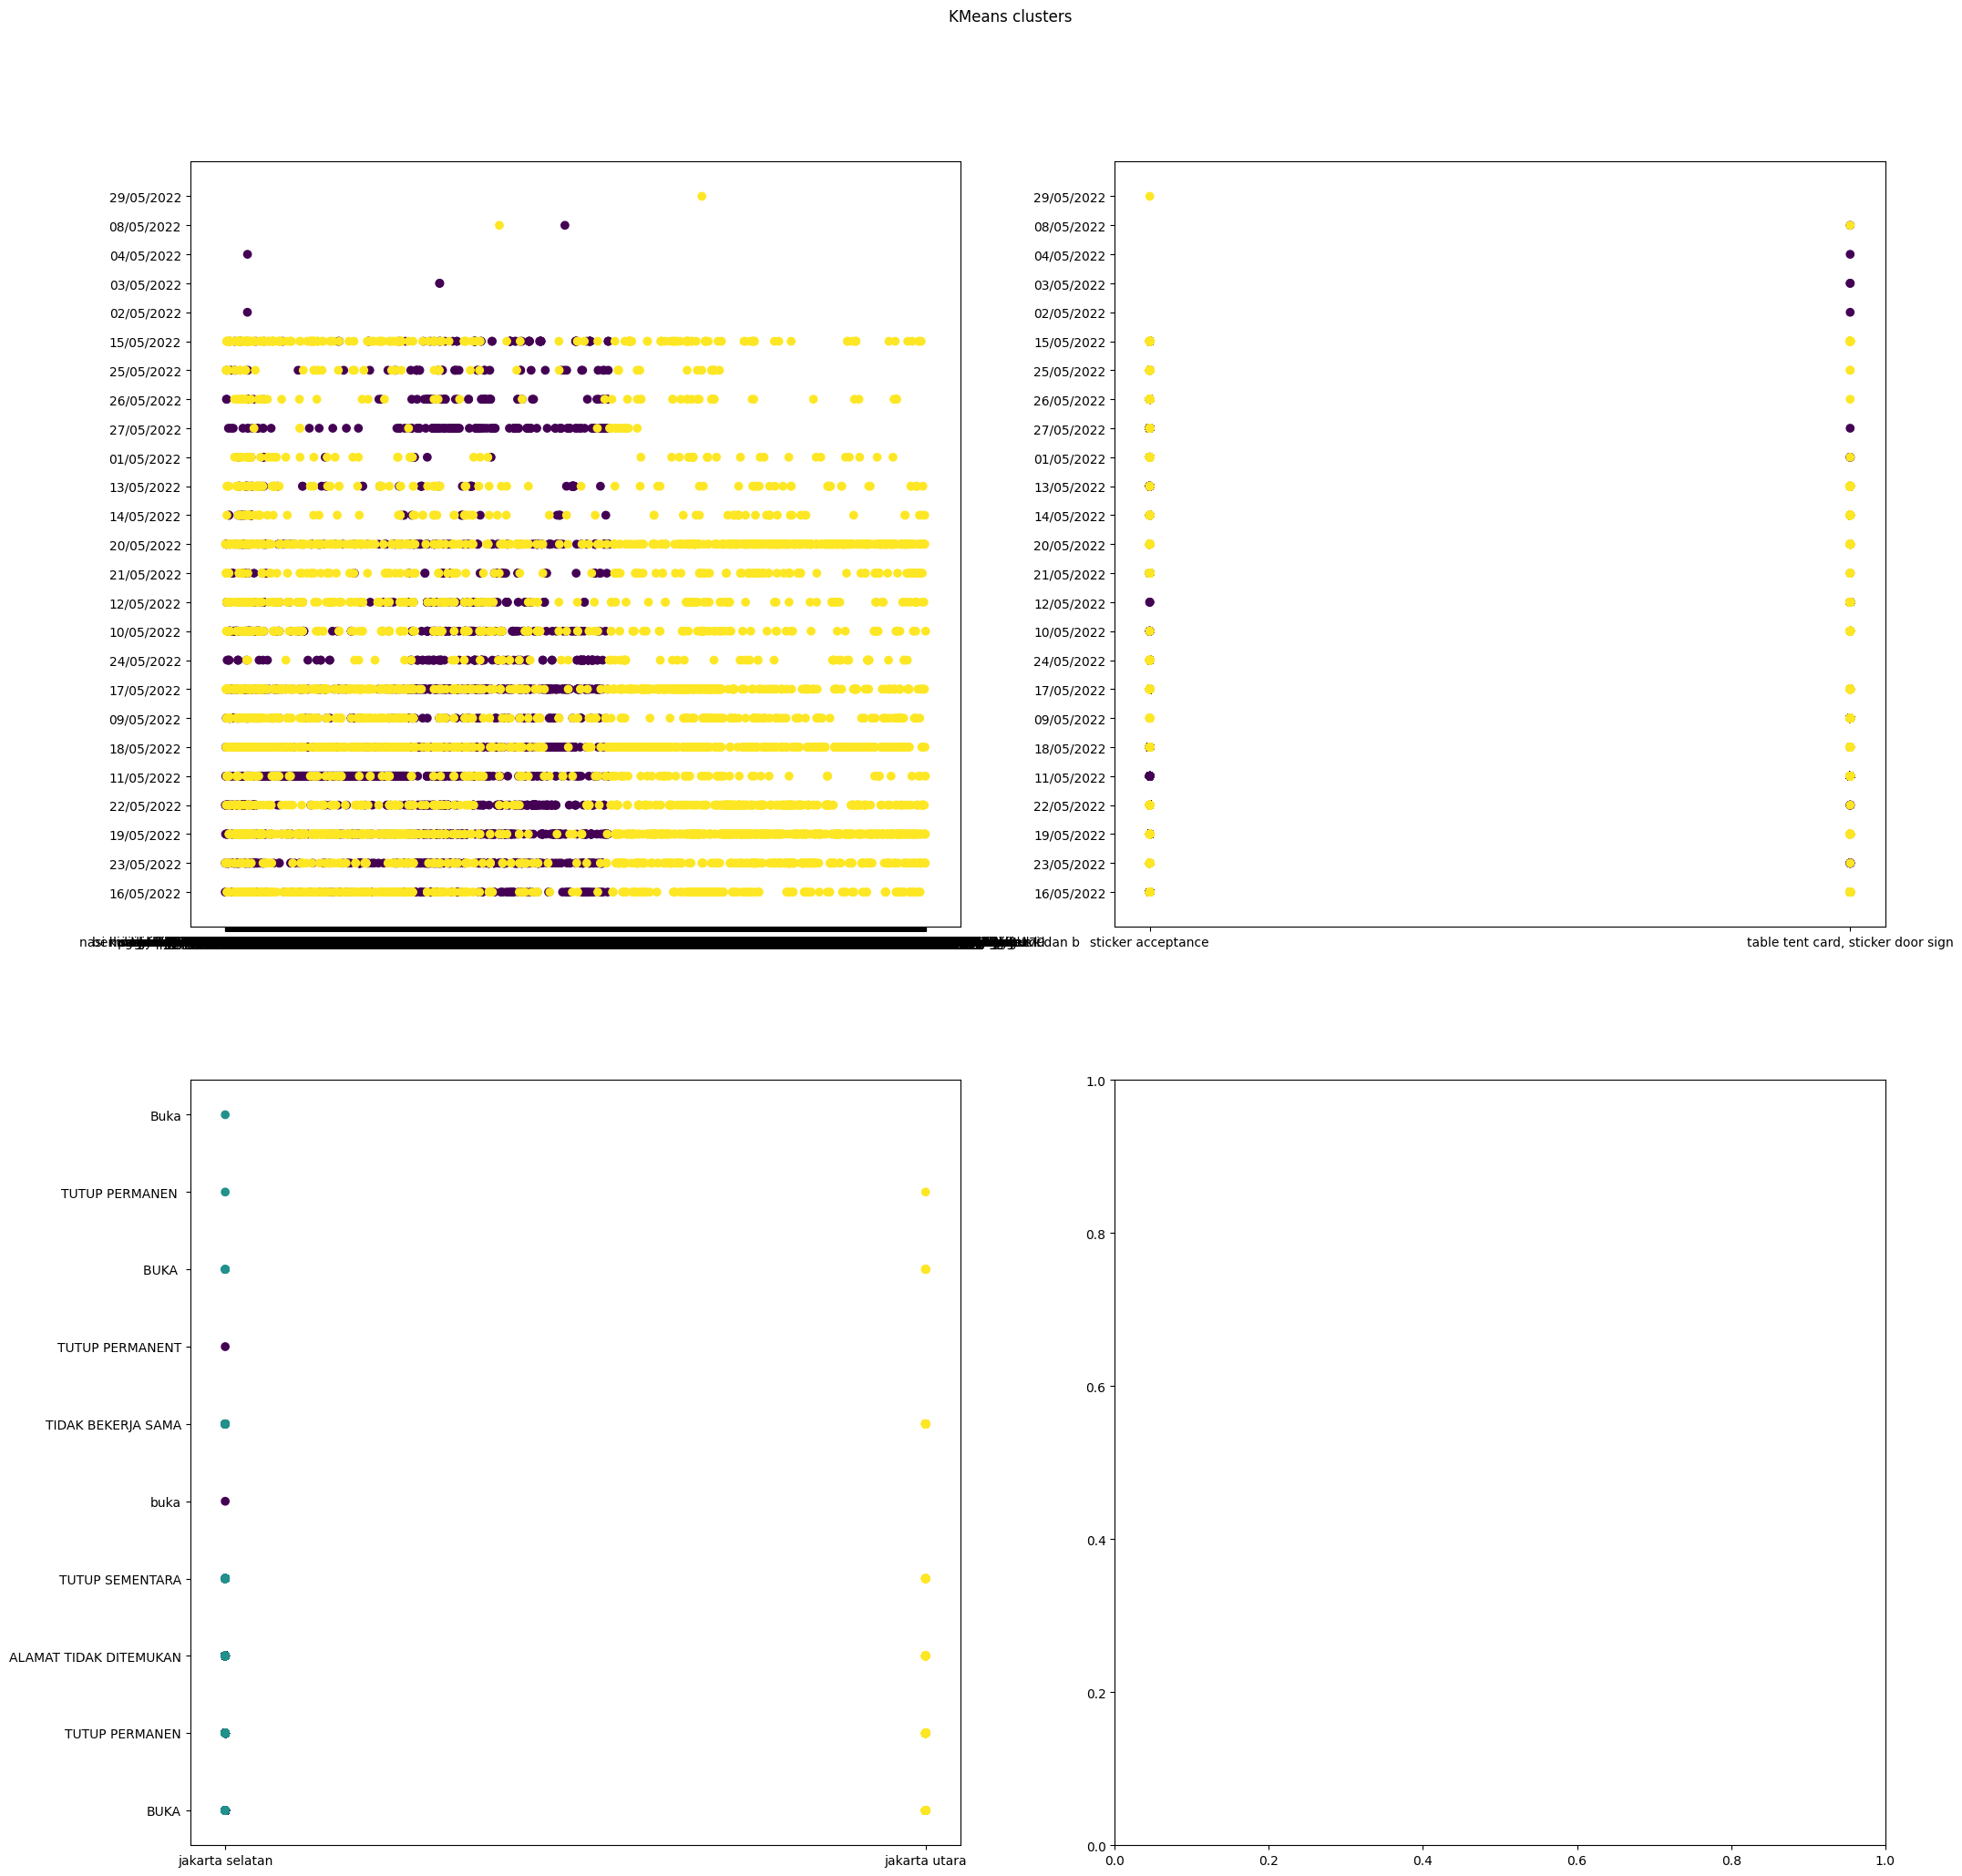

In [458]:
from sklearn.cluster import KMeans

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24, 24))

y_pred = KMeans(n_clusters=2).fit_predict(x)
axs[0, 0].scatter(x_target['merchant_name_lowered'], x_target['TANGGAL DEPLOYED'], c=y_pred)

y_pred = KMeans(n_clusters=2).fit_predict(x)
axs[0, 1].scatter(x_target['collateral_lowered'], x_target['TANGGAL DEPLOYED'], c=y_pred)

y_pred = KMeans(n_clusters=3).fit_predict(x)
axs[1, 0].scatter(x_target['city_name_lowered'], x_target['STATUS TOKO'], c=y_pred)

plt.suptitle("KMeans clusters").set_y(0.95)
plt.show()

In [459]:
y_pred = KMeans(n_clusters=5).fit_predict(x)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)